In [1]:
## Libraries:

# a) Bond graphs
import BondGraphTools as bgt

# b) Data extraction
from pyomexmeta import RDF, eUriType
import os
import sys
import xml.etree.ElementTree as ET
import rdflib
from lxml import etree
import re

# c) General
import copy
import difflib
import numpy as np
import pandas as pd
import math
import operator as op
import ast
import re

# d) Plot
import matplotlib.pyplot as plt
from matplotlib import markers
import matplotlib.font_manager as font_manager
import matplotlib.colors
from pylab import rcParams


# Integration and fitting
from scipy.optimize import curve_fit, minimize, least_squares, newton_krylov, basinhopping
from scipy  import integrate
import scipy.stats as stats



In [55]:
data=pd.read_csv('RasGTP_module_data.csv') 
Data={}
cellmlKinetics={}
labels=[]
for label in data:
    labels.append(label)
    Data[label]=[] 
    Data[label].append(data[label])
# labels for cellml kinetics
for label in labels:
    for cell in Data[label]:
        cellmlKinetics[label]=[]  
        for c in cell:
            cellmlKinetics[label].append(c)
time= cellmlKinetics['environment | time (minute)']

In [66]:

ShcGS = bgt.new("Ce", name='ShcGS', library="BioChem", value={'R':8.314, 'T':310, 'k':0.13})
RasGDP = bgt.new("Ce", name='RasGDP', library="BioChem", value={'R':8.314, 'T':310, 'k':0.13})
Ras_ShcGS = bgt.new("Ce", name='Ras_ShcGS', library="BioChem", value={'R':8.314, 'T':310, 'k':10.47})
RasGTP = bgt.new("Ce", name='RasGTP', library="BioChem", value={'R':8.314, 'T':310, 'k':0.0064})
GAP = bgt.new("Ce", name='GAP', library="BioChem", value={'R':8.314, 'T':310, 'k':0.553})
Ras_GAP= bgt.new("Ce", name='Ras_GAP', library="BioChem", value={'R':8.314, 'T':310, 'k':42.72})
Ras_Raf = bgt.new("Ce", name='Ras_Raf', library="BioChem", value={'R':8.314, 'T':310, 'k':16.07})


# Reactions

Re12 = bgt.new("Re" , name='r12' , library="BioChem", value={'R':8.314, 'T':310, 'r':0.95})
Re13 = bgt.new("Re" , name='r13' , library="BioChem", value={'R':8.314, 'T':310, 'r':1.43})
Re14 = bgt.new("Re" , name= 'r14', library="BioChem", value={'R':8.314, 'T':310, 'r':1.4})
Re15 = bgt.new("Re" , name= 'r15', library="BioChem", value={'R':8.314, 'T':310, 'r':16.85})
Re16 = bgt.new("Re" , name= 'r16', library="BioChem", value={'R':8.314, 'T':310, 'r':0.186})


# Junctions
zeroShcGS = bgt.new("0", name='ShcGS')
zeroRasGDP = bgt.new("0", name='RasGDP')
zeroRas_ShcGS = bgt.new("0", name='Ras_ShcGS')
zeroRasGTP = bgt.new("0", name='RasGTP')
zeroGAP = bgt.new("0", name='GAP')
zeroRas_GAP = bgt.new("0", name='Ras_GAP')
zeroRas_Raf = bgt.new("0", name='Ras_Raf')


oneJunc_12_reac = bgt.new("1", name='r12 reac'); oneJunc_12_prod = bgt.new("1", name='r12 prod');
oneJunc_13_reac = bgt.new("1", name='r13 reac'); oneJunc_13_prod = bgt.new("1", name='r13 prod');
oneJunc_14_reac = bgt.new("1", name='r14 reac'); oneJunc_14_prod = bgt.new("1", name='r14 prod');
oneJunc_15_reac = bgt.new("1", name='r15 reac'); oneJunc_15_prod = bgt.new("1", name='r15 prod');
oneJunc_16_reac = bgt.new("1", name='r16 reac'); oneJunc_16_prod = bgt.new("1", name='r16 prod');
   

C13x = bgt.new("Ce", name='C13x', library="BioChem", value={'R':8.314, 'T':310, 'k':1e-12})
C15x = bgt.new("Ce", name='C15x', library="BioChem", value={'R':8.314, 'T':310, 'k':1e-12})



In [67]:
model=bgt.new(name='Ras Module')

bgt.add(model,ShcGS,RasGDP,Ras_ShcGS,RasGTP,GAP,Ras_GAP,Ras_Raf,C13x,C15x,Re12,Re13,Re14,Re15,Re16,\
       zeroShcGS,zeroRasGDP,zeroRas_ShcGS,zeroRasGTP,zeroGAP,zeroRas_GAP,zeroRas_Raf,\
       oneJunc_12_reac,oneJunc_13_reac,oneJunc_14_reac,oneJunc_15_reac,oneJunc_16_reac,\
       oneJunc_12_prod,oneJunc_13_prod,oneJunc_14_prod,oneJunc_15_prod,oneJunc_16_prod)

        
bgt.connect(zeroShcGS,ShcGS)
bgt.connect(zeroRasGDP,RasGDP)
bgt.connect(zeroRas_ShcGS,Ras_ShcGS)
bgt.connect(zeroRasGTP,RasGTP)
bgt.connect(zeroGAP,GAP)
bgt.connect(zeroRas_GAP,Ras_GAP)
bgt.connect(zeroRas_Raf,Ras_Raf)

bgt.connect(oneJunc_12_reac,Re12);   bgt.connect(Re12,oneJunc_12_prod);
bgt.connect(oneJunc_13_reac,Re13);   bgt.connect(Re13,oneJunc_13_prod);
bgt.connect(oneJunc_14_reac,Re14);   bgt.connect(Re14,oneJunc_14_prod);
bgt.connect(oneJunc_15_reac,Re15);   bgt.connect(Re15,oneJunc_15_prod);
bgt.connect(oneJunc_16_reac,Re16);   bgt.connect(Re16,oneJunc_16_prod);


bgt.connect(zeroShcGS,oneJunc_12_reac)
bgt.connect(zeroRasGDP,oneJunc_12_reac)
bgt.connect(oneJunc_12_prod,zeroRas_ShcGS)
bgt.connect(zeroRas_ShcGS,oneJunc_13_reac)
bgt.connect(oneJunc_13_prod,zeroRasGTP)
bgt.connect(zeroRasGTP,oneJunc_16_reac)
bgt.connect(zeroRasGTP,oneJunc_14_reac)
bgt.connect(oneJunc_14_prod,zeroRas_GAP)
bgt.connect(zeroRas_GAP,oneJunc_15_reac)
bgt.connect(oneJunc_15_prod,zeroGAP)
bgt.connect(oneJunc_15_prod,zeroRasGDP)
bgt.connect(zeroGAP,oneJunc_14_reac)
bgt.connect(oneJunc_16_prod,zeroRas_Raf)
        
        
for i in range(len(model.components)):
    if model.components[i].metamodel == '1' and model.components[i].name=='r13 prod':
        bgt.connect(model.components[i],C13x)
    if model.components[i].metamodel == '1' and model.components[i].name=='r15 prod':
        bgt.connect(model.components[i],C15x)
        

In [68]:
model.state_vars

{'x_0': (C: ShcGS, 'q_0'),
 'x_1': (C: RasGDP, 'q_0'),
 'x_2': (C: Ras_ShcGS, 'q_0'),
 'x_3': (C: RasGTP, 'q_0'),
 'x_4': (C: GAP, 'q_0'),
 'x_5': (C: Ras_GAP, 'q_0'),
 'x_6': (C: Ras_Raf, 'q_0'),
 'x_7': (C: C13x, 'q_0'),
 'x_8': (C: C15x, 'q_0')}

In [69]:
x_0={}
x_0['x_0']=0
x_0['x_1']=19800
x_0['x_2']=0
x_0['x_3']=200
x_0['x_4']=15000
x_0['x_5']=0
x_0['x_6']=0
x_0['x_7']=1
x_0['x_8']=1


In [70]:
t_span = [0,0.5]
t, x = bgt.simulate(model, timespan=t_span, control_vars={}, x0=x_0, dt=0.001)

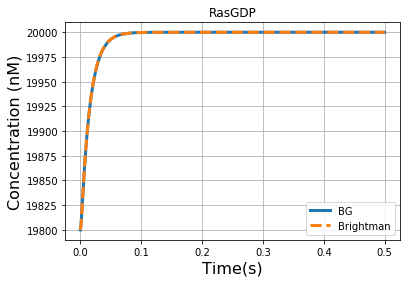

In [78]:
plt.title('RasGDP')
plt.plot(t,x[:,1], label='BG',  linewidth=3)
plt.plot(time,cellmlKinetics['RasGDP | RasGDP (dimensionless) | Run #1'], '--', label='Brightman', linewidth=3)

plt.legend(loc='lower right')
plt.xlabel('Time(s)',fontsize=16)
plt.ylabel('Concentration (nM)',fontsize=16)
    
plt.grid()

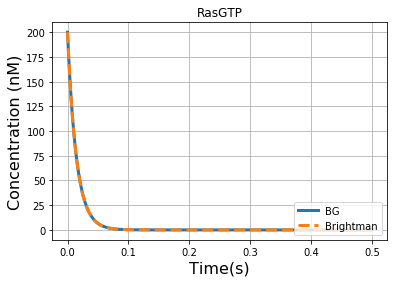

In [79]:
plt.title('RasGTP')
plt.plot(t,x[:,3], label='BG',  linewidth=3)
plt.plot(time,cellmlKinetics['RasGTP | RasGTP (dimensionless) | Run #1'], '--', label='Brightman',  linewidth=3)

plt.legend(loc='lower right')
plt.xlabel('Time(s)',fontsize=16)
plt.ylabel('Concentration (nM)',fontsize=16)
    
plt.grid()

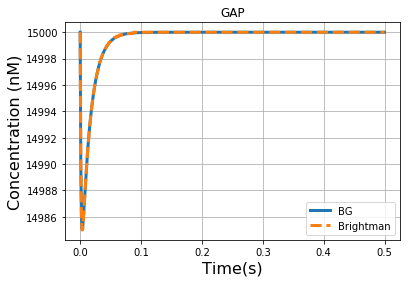

In [80]:
plt.title('GAP')
plt.plot(t,x[:,4], label='BG',  linewidth=3)
plt.plot(time,cellmlKinetics['GAP | GAP (dimensionless) | Run #1'], '--', label='Brightman',  linewidth=3)

plt.legend(loc='lower right')
plt.xlabel('Time(s)',fontsize=16)
plt.ylabel('Concentration (nM)',fontsize=16)
    
plt.grid()

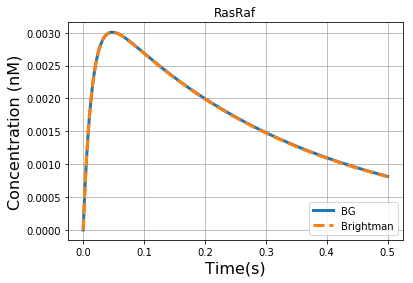

In [81]:
plt.title('RasRaf')
plt.plot(t,x[:,6], label='BG',  linewidth=3)
plt.plot(time,cellmlKinetics['Ras_Raf | Ras_Raf (dimensionless) | Run #1'], '--', label='Brightman',  linewidth=3)

plt.legend(loc='lower right')
plt.xlabel('Time(s)',fontsize=16)
plt.ylabel('Concentration (nM)',fontsize=16)
    
plt.grid()

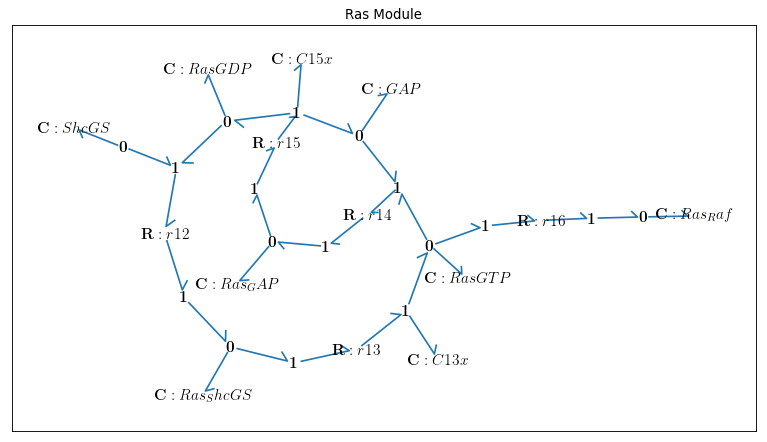

In [38]:
bgt.draw(model)

In [83]:
column_names=['Time','RasGDP','GAP','RasGTP','Ras_Raf',]

df = pd.DataFrame(columns = column_names)

df["Time"] = [point[0] for point in t]

df["RasGDP"] = x[:,1]
df["GAP"] = x[:,4]
df["RasGTP"] = x[:,3]
df["Ras_Raf"] = x[:,6]

df.to_csv('RasModuleBG.csv')